In [124]:
#Importing the required datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
#Loading the ShopSphereDataset

df = pd.read_csv("ShopSphere_Dataset.csv")

***Analysing and Observing the Datasets properties***

In [126]:
#Checking the top 5 of the datasets 
df.head(n=5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States


In [127]:
#Checking the bottom 5 of the datasets
df.tail(n=5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States


In [128]:
# Checking the datasets datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385314 entries, 0 to 385313
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    385314 non-null  int64  
 1   InvoiceDate  385314 non-null  object 
 2   CustomerID   385314 non-null  int64  
 3   StockCode    385314 non-null  int64  
 4   Description  385314 non-null  object 
 5   Quantity     385314 non-null  int64  
 6   UnitPrice    385314 non-null  float64
 7   Country      385314 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 23.5+ MB


***Data Cleaning and Preprocessing***

In [129]:
# To check if the datasets have a mising value
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

***Correcting Inconsistencies in the dataframe***


***1) The InvoiceDate datatype (object), corrected to date/time dtype*** 

***2) We need to convert the CustomerID column to an object from integer***

In [130]:
#Converting the InvoiceDate dtypes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [131]:
#Converting the CustomerID dtypes
df['CustomerID'] = df['CustomerID'].astype('object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385314 entries, 0 to 385313
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    385314 non-null  int64         
 1   InvoiceDate  385314 non-null  datetime64[ns]
 2   CustomerID   385314 non-null  object        
 3   StockCode    385314 non-null  int64         
 4   Description  385314 non-null  object        
 5   Quantity     385314 non-null  int64         
 6   UnitPrice    385314 non-null  float64       
 7   Country      385314 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 23.5+ MB


In [133]:
df.shape

(385314, 8)

In [134]:
#Checking for the number of unique values in the datasets 
df.nunique()

InvoiceNo      20990
InvoiceDate    20980
CustomerID      4372
StockCode        800
Description       10
Quantity         100
UnitPrice      21420
Country            2
dtype: int64

In [135]:
#Data description
df.describe()

,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice
count,385314.000000,385314,385314.000000,385314.000000,385314.000000
mean,410481.180074,2024-08-02 00:30:08.128438528,40339.113494,50.503283,46.416868
min,400000.000000,2023-12-01 00:25:31,40000.000000,1.000000,1.000000
25%,405223.000000,2024-05-14 14:00:08,40127.000000,31.000000,16.370000
50%,410453.000000,2024-08-20 04:54:48,40288.000000,51.000000,33.590000
75%,415747.000000,2024-11-02 13:06:42,40559.000000,70.000000,62.310000
max,420989.000000,2024-12-31 23:52:56,40799.000000,100.000000,384.900000
std,6066.054690,NaN,239.679387,26.674684,41.658811


In [136]:
#Checking for Duplicate values 
df.duplicated().any()

False

In [137]:
df.head(n=5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States


***Feature Engineering***

In [138]:
#Creating a new features such as Revenue 

df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [139]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64


In [140]:
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States,705.95
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States,2014.74
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States,1513.92
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States,3994.00
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States,2325.44


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385314 entries, 0 to 385313
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    385314 non-null  int64         
 1   InvoiceDate  385314 non-null  datetime64[ns]
 2   CustomerID   385314 non-null  object        
 3   StockCode    385314 non-null  int64         
 4   Description  385314 non-null  object        
 5   Quantity     385314 non-null  int64         
 6   UnitPrice    385314 non-null  float64       
 7   Country      385314 non-null  object        
 8   Revenue      385314 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 26.5+ MB


In [142]:
#To validate that our Quantity and UnitPrice Columns are not negative. 
cols = ['Quantity', 'UnitPrice']
(df[cols] <= 0).any()

Quantity     False
UnitPrice    False
dtype: bool

In [143]:
#Calculate the average revenue
avg_revenue = (df['Revenue']).mean()

In [144]:
print("Average Revenue:", avg_revenue)

Average Revenue: 2341.7934992499618


In [145]:
# Extract date components for time-based analysis
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

In [146]:
print(f"Dataset Shape: {df.shape}")
print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Dataset Shape: (385314, 14)
Date Range: 2023-12-01 00:25:31 to 2024-12-31 23:52:56


In [147]:
#To view the total revenue, unique customers and unique products

print(f"Total Revenue: ${df['Revenue'].sum():,.2f}")
print(f"Unique Customers: {df['CustomerID'].nunique():,}")
print(f"Unique Products: {df['StockCode'].nunique():,}")

Total Revenue: $902,325,820.37
Unique Customers: 4,372
Unique Products: 800


In [148]:
#To check for the top_countries using the unique customerID 

Top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print(Top_countries)

Country
United States     4372
United Kingdom    4359
Name: CustomerID, dtype: int64


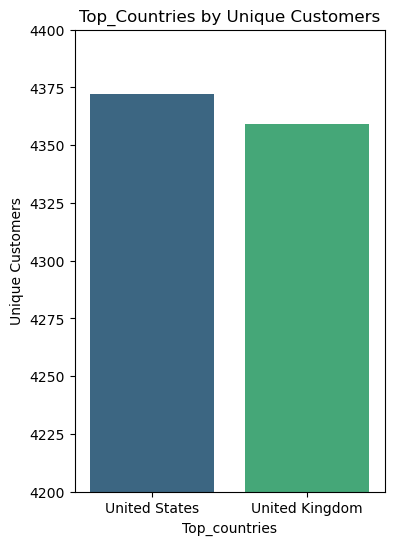

In [149]:
#Plotting Top countries by unique customers 

plt.figure(figsize =(4,6))
sns.barplot(x=Top_countries.index, y=Top_countries.values, hue=Top_countries.index, palette='viridis', legend=False)
plt.ylim(4200, 4400)
plt.title('Top_Countries by Unique Customers')
plt.xlabel('Top_countries')
plt.ylabel('Unique Customers')
plt.show()

***COHORT RETENTION HEATMAP***

In [150]:
#Creating the Cohort and Tracking it overtime to know the first purchase Month
#To get the first purchase, we will consider the InvoiceDate

df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [151]:
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,Year,Month,Quarter,DayOfWeek,Hour,InvoiceMonth
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36,2024,1,1,Sunday,3,2024-01
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04,2024,1,1,Sunday,3,2024-01
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68,2024,1,1,Sunday,3,2024-01
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10,2024,1,1,Sunday,3,2024-01
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64,2024,1,1,Sunday,3,2024-01


In [152]:
#To group base on CohortMonth and the first purchase
Cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()
Cohort_data.name = 'CohortMonth'

In [153]:
#The CohortMonth created is needed to be merged to the dataframe 
df = df.merge(Cohort_data, on='CustomerID')

In [154]:
df.tail(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,Year,Month,Quarter,DayOfWeek,Hour,InvoiceMonth,CohortMonth
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States,705.95,2024,10,4,Friday,9,2024-10,2024-05
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States,2014.74,2024,10,4,Friday,9,2024-10,2024-05
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States,1513.92,2024,10,4,Friday,9,2024-10,2024-05
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States,3994.00,2024,10,4,Friday,9,2024-10,2024-05
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States,2325.44,2024,10,4,Friday,9,2024-10,2024-05


***Calculating Cohort Index (months since first purchase)***

In [155]:
#To get the CohortIndex, we will consider the Invoice Month, and Cohort Month

Invoice_year, InvoiceMonth = df['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month
Cohort_year, CohortMonth = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [156]:
year_diff = Invoice_year - Cohort_year
month_diff = InvoiceMonth - CohortMonth

In [157]:
#To get the CohortIndex(It helps to capture the number of time the customer came to purchase)
df['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [158]:
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,Year,Month,Quarter,DayOfWeek,Hour,InvoiceMonth,CohortMonth,CohortIndex
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36,2024,1,1,Sunday,3,2024-01,2024-01,1
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04,2024,1,1,Sunday,3,2024-01,2024-01,1
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68,2024,1,1,Sunday,3,2024-01,2024-01,1
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10,2024,1,1,Sunday,3,2024-01,2024-01,1
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64,2024,1,1,Sunday,3,2024-01,2024-01,1


In [159]:
df.tail(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,Year,Month,Quarter,DayOfWeek,Hour,InvoiceMonth,CohortMonth,CohortIndex
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States,705.95,2024,10,4,Friday,9,2024-10,2024-05,6
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States,2014.74,2024,10,4,Friday,9,2024-10,2024-05,6
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States,1513.92,2024,10,4,Friday,9,2024-10,2024-05,6
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States,3994.00,2024,10,4,Friday,9,2024-10,2024-05,6
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States,2325.44,2024,10,4,Friday,9,2024-10,2024-05,6


***To Build Retention Table, we will create cohort count and pivot table***

In [160]:
#Creating the Cohort Count 
Cohort_Counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [161]:
Cohort_Counts

,CohortMonth,CohortIndex,CustomerID
0,2023-12,1,344
1,2023-12,2,79
2,2023-12,3,73
3,2023-12,4,97
4,2023-12,5,90
...,...,...,...
86,2024-10,2,77
87,2024-10,3,83
88,2024-11,1,352
89,2024-11,2,81


In [162]:
#To create the Cohort Pivot 
Cohort_Pivot = Cohort_Counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [163]:
Cohort_Pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-12,344.0,79.0,73.0,97.0,90.0,90.0,95.0,100.0,96.0,118.0,94.0,138.0,83.0
2024-01,329.0,78.0,94.0,93.0,76.0,92.0,88.0,84.0,90.0,101.0,87.0,131.0,NaN
2024-02,337.0,86.0,95.0,94.0,83.0,96.0,82.0,99.0,94.0,109.0,106.0,NaN,NaN
2024-03,334.0,73.0,86.0,99.0,91.0,98.0,88.0,95.0,106.0,98.0,NaN,NaN,NaN
2024-04,334.0,101.0,86.0,92.0,96.0,103.0,93.0,92.0,91.0,NaN,NaN,NaN,NaN
2024-05,349.0,91.0,81.0,94.0,103.0,102.0,109.0,90.0,NaN,NaN,NaN,NaN,NaN
2024-06,312.0,76.0,74.0,80.0,82.0,98.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,347.0,107.0,82.0,89.0,98.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08,335.0,81.0,80.0,92.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#To get the retention rate we will consider the cohort size 
Cohort_Size = Cohort_Pivot.iloc[:,0]
Retention = Cohort_Pivot.divide(Cohort_Size, axis=0).round(3)

In [165]:
Retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-12,1.0,0.230,0.212,0.282,0.262,0.262,0.276,0.291,0.279,0.343,0.273,0.401,0.241
2024-01,1.0,0.237,0.286,0.283,0.231,0.280,0.267,0.255,0.274,0.307,0.264,0.398,NaN
2024-02,1.0,0.255,0.282,0.279,0.246,0.285,0.243,0.294,0.279,0.323,0.315,NaN,NaN
2024-03,1.0,0.219,0.257,0.296,0.272,0.293,0.263,0.284,0.317,0.293,NaN,NaN,NaN
2024-04,1.0,0.302,0.257,0.275,0.287,0.308,0.278,0.275,0.272,NaN,NaN,NaN,NaN
2024-05,1.0,0.261,0.232,0.269,0.295,0.292,0.312,0.258,NaN,NaN,NaN,NaN,NaN
2024-06,1.0,0.244,0.237,0.256,0.263,0.314,0.276,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,1.0,0.308,0.236,0.256,0.282,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08,1.0,0.242,0.239,0.275,0.278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


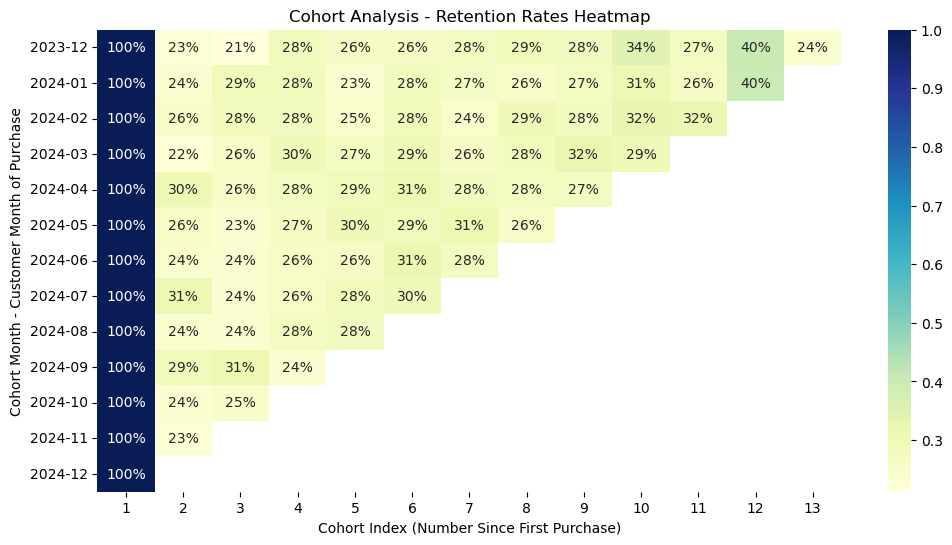

In [166]:
plt.figure(figsize=(12,6))
sns.heatmap(Retention, annot=True, fmt= '.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rates Heatmap')
plt.xlabel('Cohort Index (Number Since First Purchase)')
plt.ylabel('Cohort Month - Customer Month of Purchase')
plt.show()

***Customer Segmentation***

In [167]:
#Checking the last date (MAximun) of transaction using InvoiceDate

reference_Date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [168]:
reference_Date

Timestamp('2025-01-01 23:52:56')

In [169]:
#Applying RFM analysis to capture our customers contribution 
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x:(reference_Date - x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue':'sum'
}).reset_index()

In [170]:
#Grouping the RFM values using the CustomerID. 
#To check how often the customer contribute using the RFM analysis

rfm.columns = ['CustomerID', 'recency_days', 'frequency', 'Monetary']

In [171]:
rfm.head()

,CustomerID,recency_days,frequency,Monetary
0,10000,140,5,242993.87
1,10001,86,1,20841.75
2,10002,23,6,254693.19
3,10003,89,2,115314.08
4,10004,100,7,305794.35


In [175]:
#Standardizing the RFM features
#The RFM values are being standardised because that is the value the model understand.

from sklearn.preprocessing import StandardScaler

In [173]:
X = rfm[['recency_days','frequency','Monetary']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [174]:
X_scaled

array([[ 1.07915363,  0.06017119,  0.25019975],
       [ 0.26375028, -1.14933883, -1.26817781],
       [-0.68755362,  0.36254869,  0.33016291],
       ...,
       [-0.37045232, -1.14933883, -1.05706758],
       [-0.86875437,  1.57205871,  1.76664742],
       [ 0.20335003,  0.06017119,  0.20268637]])

In [177]:
#After generating the standardised values, the k-mean models will be trained and used to 
#create clusters of our customers

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [179]:
#To get the best possible of the clusters, we can then consider inertia

inertia = []
sil_scores = []
k_range = range(2,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state =42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

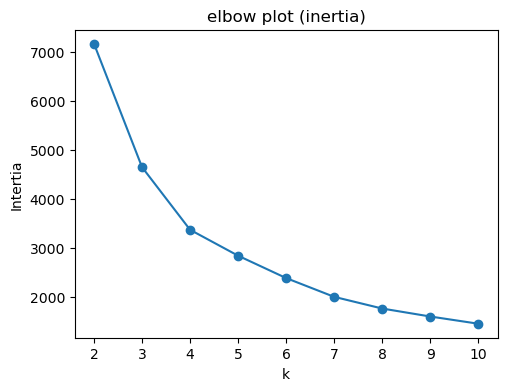

In [183]:
#Visualising the k-mean of the clusters created

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title('elbow plot (inertia)')
plt.ylabel('Intertia')
plt.xlabel('k')
plt.show()

***With the plot that was visualize it shows that our k = 4 which means the number of clusters***

***However, we will consider sil score to check if the accuracy is right***


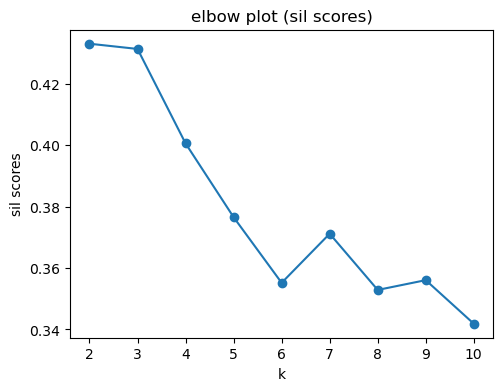

In [184]:
#Visauling the sil_scores value for our prediction 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range, sil_scores, marker='o')
plt.title('elbow plot (sil scores)')
plt.ylabel('sil scores')
plt.xlabel('k')
plt.show()

***Sil score also shows that k =4 which means the same number with k_range for the clusters***

In [186]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [189]:
#We can aslo consider what is know as yellowbrick to determine our kmean

from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

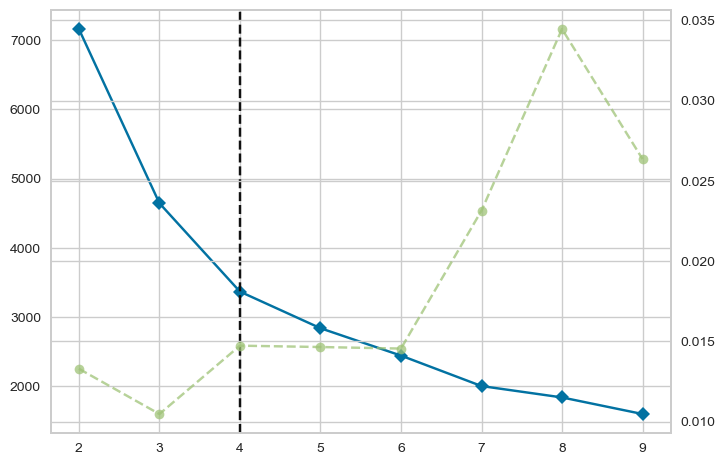

In [190]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)

***The yellowbrick approach also confirm our kmean =4, so therefore we can conclude we have 4 clusters***

In [191]:
#Training the KMean=4 data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [193]:
#Creating a cluster column and labels in the rfm df
rfm['clusters'] = kmeans.labels_
rfm.head()

,CustomerID,recency_days,frequency,Monetary,clusters
0,10000,140,5,242993.87,2
1,10001,86,1,20841.75,1
2,10002,23,6,254693.19,0
3,10003,89,2,115314.08,1
4,10004,100,7,305794.35,0


In [194]:
#After creating labels for the cluster, then we can now do a cluster profiling

cluster_profile =rfm.groupby('clusters').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID':'NumCustomers'}).round(1)
 

In [196]:
cluster_profile

,recency_days,frequency,Monetary,NumCustomers
clusters,,,,
0,47.1,6.3,269730.0,1367
1,45.0,2.4,99169.9,1733
2,186.8,2.9,125700.8,719
3,41.5,11.2,490713.6,553


In [199]:
#Next is to create a segment to better explain the clusters generated

cluster_names = {
    3: 'VVIPs',
    0: 'VIPs',
    1: 'Loyal regular customers',
    2: 'At risk/ Lost Customer'
}

In [200]:
cluster_profile['Segments'] = cluster_profile.index.map(cluster_names)

In [201]:
cluster_profile

,recency_days,frequency,Monetary,NumCustomers,Segments
clusters,,,,,
0,47.1,6.3,269730.0,1367,VIPs
1,45.0,2.4,99169.9,1733,Loyal regular customers
2,186.8,2.9,125700.8,719,At risk/ Lost Customer
3,41.5,11.2,490713.6,553,VVIPs


***Visualising the Clusters based on the RFM Analysis***

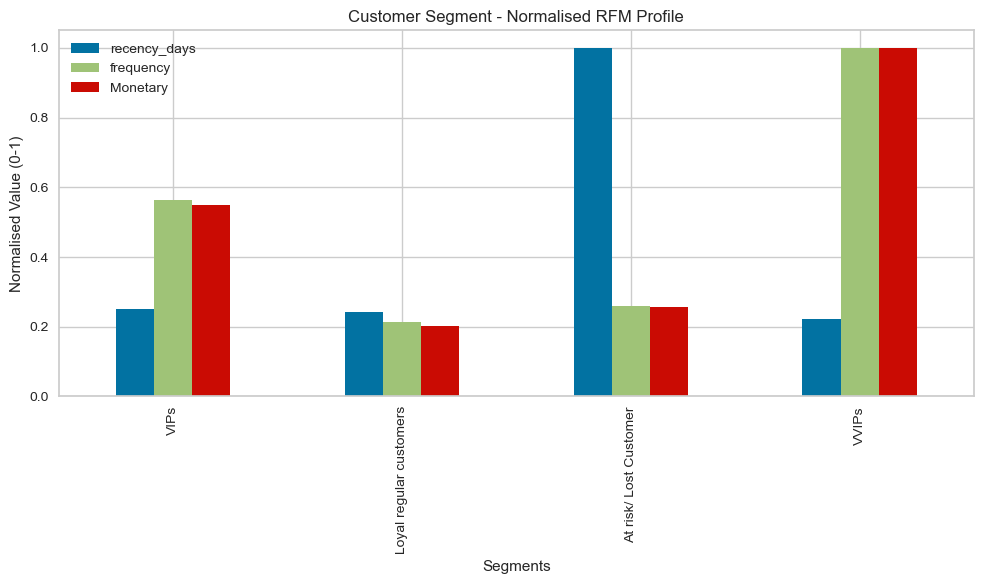

In [204]:
df_plot = cluster_profile.copy()
df_plot[['recency_days', 'frequency', 'Monetary']]=(
    df_plot[['recency_days', 'frequency', 'Monetary']].apply(lambda x: x/x.max())
)
df_plot.set_index('Segments')[['recency_days', 'frequency', 'Monetary']].plot(kind='bar', figsize=(10,6))
plt.title('Customer Segment - Normalised RFM Profile')
plt.ylabel('Normalised Value (0-1)')
plt.tight_layout()
plt.show()